In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
# df_results = pd.read_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\ufc_da2_model_results_test.csv')
df_history = pd.read_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\model_results_train_v2.csv')
df_results = pd.read_csv(r'C:\Users\jcmar\my_files\SportsBetting\data\model_results_v2.csv')

df_results['pred_winner'] = np.where(df_results['correct_pred']==1, df_results['winner'], np.abs(1-df_results['winner']))
df_results['Date'] = df_results["event_dates"].copy()
df_results.sort_values(by='Date', ascending=True).reset_index(drop=True)

df_results['prob_winner'] = df_results[['red_probs','blue_probs']].max(axis=1)
df_results['winner_odds'] = np.where(df_results['winner'] == 1, df_results['open_red'], df_results['open_blue'])
df_results['choice_fighter_bet'] = np.where(df_results['pred_winner'] == 1, df_results['open_red'], df_results['open_blue'])
df_results['Date'] = df_results["Date"].astype(str)

df_correct_pred = df_results[df_results["correct_pred"] == 1].copy() 
df_incorrect_pred = df_results[df_results["correct_pred"] == 0].copy()

pred_correct_odds = df_results[df_results["correct_pred"] == 1]['choice_fighter_bet'].value_counts().sort_index()
pred_incorrect_odds = df_results[df_results["correct_pred"] == 0]['choice_fighter_bet'].value_counts().sort_index()

df_results.head()

,Unnamed: 0,blue_probs,red_probs,pred_winner,winner,correct_pred,event_dates,open_red,open_blue,close1_red,close1_blue,close2_red,close2_blue,red_fighter,blue_fighter,Date,prob_winner,winner_odds,choice_fighter_bet
0,0,0.543981,0.456019,0,0,1,2023-08-12,163.0,-200.0,164.0,-225.0,180.0,-198.0,josh parisian,martin buday,2023-08-12,0.543981,-200.0,-200.0
1,1,0.570416,0.429584,0,0,1,2023-08-12,300.0,-400.0,260.0,-450.0,350.0,-335.0,jp buys,marcus mcghee,2023-08-12,0.570416,-400.0,-400.0
2,2,0.788572,0.211428,0,0,1,2023-08-12,163.0,-200.0,158.0,-200.0,170.0,-188.0,polyana viana,iasmin lucindo,2023-08-12,0.788572,-200.0,-200.0
3,3,0.443205,0.556795,1,1,1,2023-08-12,-225.0,175.0,-200.0,140.0,-170.0,170.0,khalil rountree jr,chris daukaus,2023-08-12,0.556795,-225.0,-225.0
4,4,0.727696,0.272304,0,1,0,2023-08-12,200.0,-250.0,175.0,-320.0,250.0,-225.0,cub swanson,hakeem dawodu,2023-08-12,0.727696,200.0,-250.0


In [266]:
total = 3000 
interest = 0
for _ in range(5):
    interest = total *.08
    total += interest + 30000

print(total)

180406.0130304


In [263]:
(2786*24) - (1800*12) - (700*12)

36864

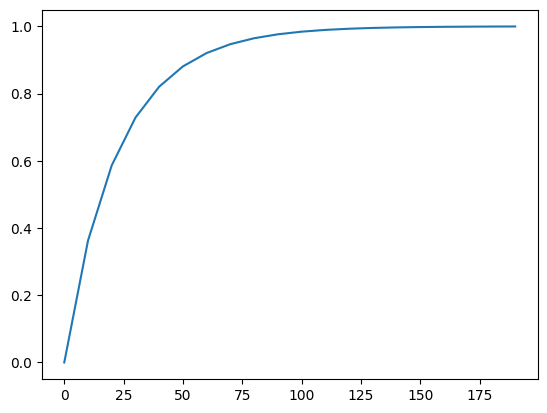

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def risk_of_ruin(a, b, p):
    """
    Args: 
        a(int): starting bankroll
        b(int): target net win
        p(float): proba of win 
    """
    q = 1-p
    r = q/p
    p_ruin = (r**a - r**(a+b)) / (1 - r**(a+b))
    return p_ruin

def plot_ruin_for_b(a, bs, p):
    """
    Args:
        bs: array of target net gains
    """

    ruins = []
    for b in bs: 
        p_ruin = risk_of_ruin(a, b, p)
        ruins.append(p_ruin)

    plt.plot(bs, ruins)
    plt.show()

bs = np.arange(0, 200, 10)
p = .49
a = 50
plot_ruin_for_b(a, bs, p)


In [ ]:
def calc_ruin_pct(bankroll, bet_amount, net_gain, p):
    bankroll_units = bankroll / bet_amount
    units_per_hand = 1
    net_units = net_gain / bet_amount

    a = bankroll_units
    b = net_units

    ruin_pct = risk_of_ruin(a,b,p)
    return ruin_pct

bankroll = 1000
bet_amount = 50
net_gain = 100
p = .49
ruin_pct = calc_ruin_pct(bankroll, bet_amount, net_gain, p)
print(ruin_pct)


0.13138219779195107
